# Al Br Neutron Flux

In [71]:
import openmc
import matplotlib.pyplot as plt
import numpy as np

## Geometry

First we define the geometry of the setup. We just use one large uniform sphere.

In [72]:
R=5
exp = openmc.Sphere(r=R,boundary_type='vacuum') #Larger sphere to have material region

## Materials

Next we define the materials we are looking at. Al and Br:

In [73]:
# Create the material (Aluminum)
al = openmc.Material()
al.add_element('aluminum',1.0)

In [74]:
# Create the material (Aluminum)
br = openmc.Material()
br.add_element('Br',1.0)

In [75]:
# Add our material to the material list
mats = openmc.Materials([al,br])
mats.export_to_xml()

We start with assigning the region as Al then do the simulatoin and then we later change the material to Br.

In [76]:
cell = openmc.Cell()
cell.region = -exp
cell.fill = al

In [77]:
uni = openmc.Universe()
uni.add_cell(cell)

In [78]:
#Export the geometry
geometry = openmc.Geometry(uni)
geometry.export_to_xml()

## Source

We now define a uniform source straight through our sphere.

In [79]:
source = openmc.Source()
source.space = openmc.stats.Box((-R, 0, 0), (R, 0, 0))
source.angle = openmc.stats.Isotropic()
source.energy = openmc.stats.Discrete([10.0], [1.0])

In [80]:
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.particles = 10_00
settings.run_mode = 'fixed source'
settings.export_to_xml()

## Tally

We define the mesh wich we use to tally up the flux in the simulation.

In [81]:
mesh = openmc.RegularMesh()
mesh.dimension = [200, 200]
mesh.lower_left = [-R, -R]
mesh.upper_right = [R, R]
xmin=mesh.lower_left[0]
xmax=mesh.upper_right[0]
ymin=mesh.lower_left[1]
ymax=mesh.upper_right[1]
N=mesh.dimension[0]
xs,ys = np.meshgrid(np.linspace(xmin,xmax,N),np.linspace(ymin,ymax,N))
# Create mesh filter for tally
mesh_filter = openmc.MeshFilter(mesh)

In [82]:
tal = openmc.Tally()
tal.scores = ['flux']
tal.filters = [mesh_filter]
tallies = openmc.Tallies([tal])
tallies.export_to_xml()

## Run Simulaiton

In [83]:
!rm -rf summary.h5
!rm -rf statepoint.100.h5
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

Save the results to `alflux`

In [84]:
sp = openmc.StatePoint('statepoint.100.h5')
tally = sp.get_tally(scores=['flux'])
alflux = tally.get_slice(scores=['flux'])
alflux.mean.shape = (200,200)

We now thange the material of the cell to br and rerun the simulation

In [85]:
cell.fill = br

In [86]:
uni = openmc.Universe()
uni.add_cell(cell)

In [87]:
#Export the geometry
geometry = openmc.Geometry(uni)
geometry.export_to_xml()

In [88]:
!rm -rf summary.h5
!rm -rf statepoint.100.h5
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

Save the results to `brflux`

In [89]:
sp = openmc.StatePoint('statepoint.100.h5')
tally = sp.get_tally(scores=['flux'])
brflux = tally.get_slice(scores=['flux'])
brflux.mean.shape = (200,200)

## Results

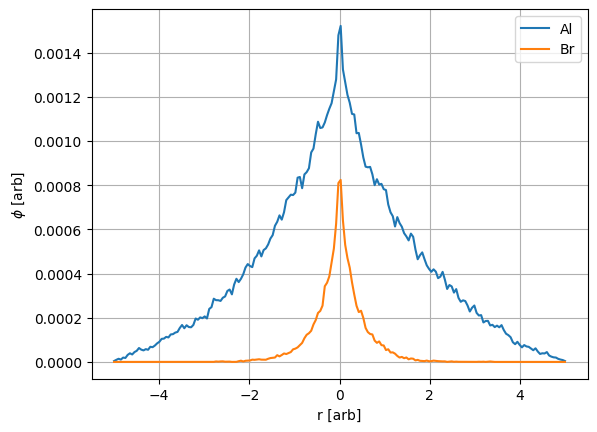

In [90]:
plt.plot(ys[:,100],alflux.mean[:,100],label="Al")
plt.plot(ys[:,100],brflux.mean[:,100],label="Br")

plt.grid(which='both')
plt.xlabel('r [arb]')
plt.ylabel(r'$\phi$ [arb]')
plt.legend()

Text(0.5, 1.0, 'Br')

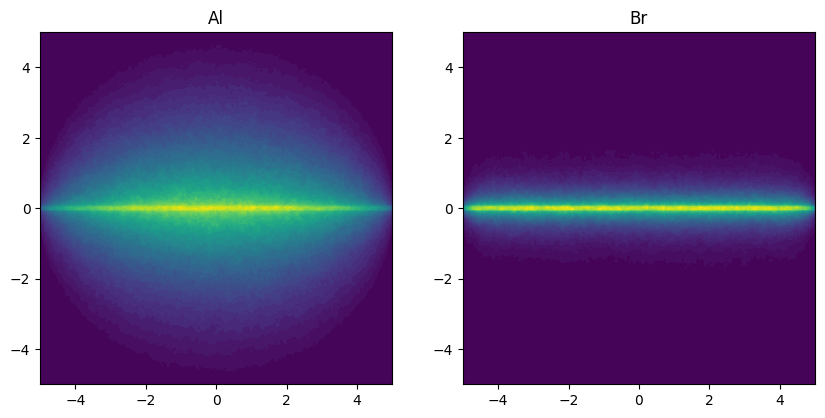

In [91]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,10))

ax1.contourf(xs,ys,alflux.mean,50)
ax1.set_aspect('equal')
ax1.set_title("Al")
ax2.contourf(xs,ys,brflux.mean,50)
ax2.set_aspect('equal')
ax2.set_title("Br")